In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset with low_memory=False to suppress DtypeWarning
df = pd.read_csv("../Data/All lending loan club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv", low_memory=False)

In [3]:
# Filter out loan status entries
df = df.loc[(df['loan_status'] == 'Charged Off') | (df['loan_status'] == 'Fully Paid')]

In [4]:
# Display basic information about the filtered dataset
print("Shape of the filtered dataset:", df.shape)
print("\nColumn names and data types:")
df.dtypes

Shape of the filtered dataset: (1345310, 151)

Column names and data types:


id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [5]:
# Display the first few rows of the filtered dataset
print("\nFirst few rows of the filtered dataset:")
df.head()


First few rows of the filtered dataset:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Summary statistics for numeric variables
numeric_vars = ['installment']
print("\nSummary statistics for numeric variables:")
df[numeric_vars].groupby(df['loan_status']).describe()


Summary statistics for numeric variables:


installment                                                 \
                  count        mean         std    min     25%     50%   
loan_status                                                              
Charged Off    268559.0  465.147994  262.774106  21.62  275.29  402.83   
Fully Paid    1076751.0  431.323226  260.759563   4.93  240.92  368.26   

                              
                75%      max  
loan_status                   
Charged Off  605.31  1717.63  
Fully Paid   573.06  1719.83

In [7]:
# Summary statistics for categorical variables
categorical_vars = ['verification_status', 'installment', 'emp_length', 'term', 'grade', 'sub_grade']
print("\nSummary statistics for categorical variables:")
for var in categorical_vars:
    df.groupby(['loan_status', var]).size().unstack()


Summary statistics for categorical variables:


In [8]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


id                             0
member_id                1345310
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        1312034
settlement_date          1312034
settlement_amount        1312034
settlement_percentage    1312034
settlement_term          1312034
Length: 151, dtype: int64

## Exploratory Data Analysis (EDA)

`loan_amnt`

In [19]:
df['loan_amnt'].describe()

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Amount in USD')]

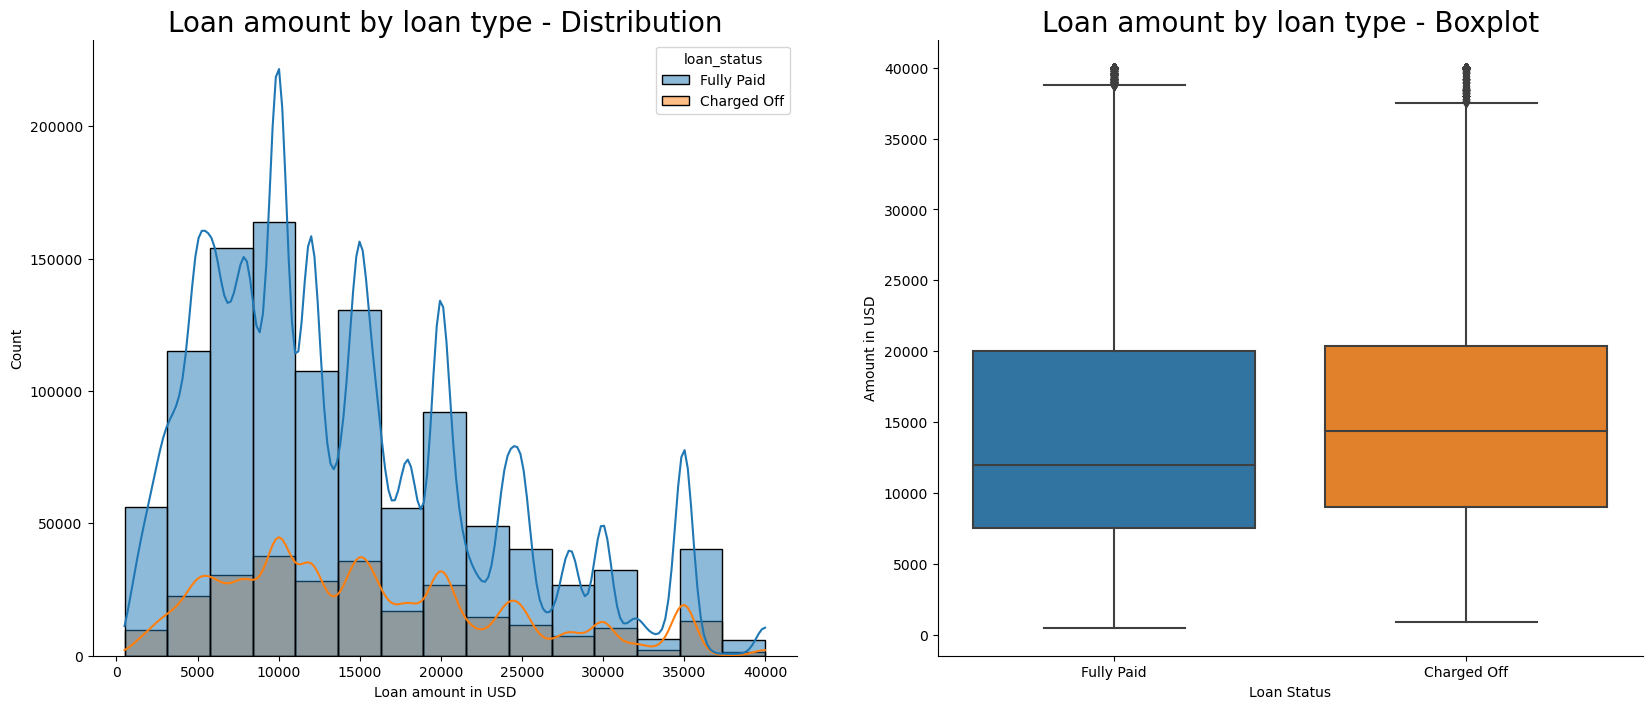

In [21]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Loan amount in USD', ylabel='')
ax[0].set_title('Loan amount by loan type - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Loan amount by loan type - Boxplot', size=20)

sns.histplot(data=df,x="loan_amnt",hue="loan_status",bins=15,
             kde=True,ax=ax[0])
sns.boxplot(data=df,x="loan_status",y="loan_amnt",ax=ax[1]).set(xlabel='Loan Status',
                                                              ylabel='Amount in USD')

As observed in the histogram plot, `loan_amnt`'s distribution is right skewed. From looking at the boxplot, the feature descriptively looks pretty much normal with relatively low number of outliers.

`revol_bal`

In [22]:
df['revol_bal'].describe()

count    1.345310e+06
mean     1.624811e+04
std      2.232817e+04
min      0.000000e+00
25%      5.943000e+03
50%      1.113400e+04
75%      1.975575e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

[Text(0.5, 0, 'Loan status'), Text(0, 0.5, 'Amount in USD')]

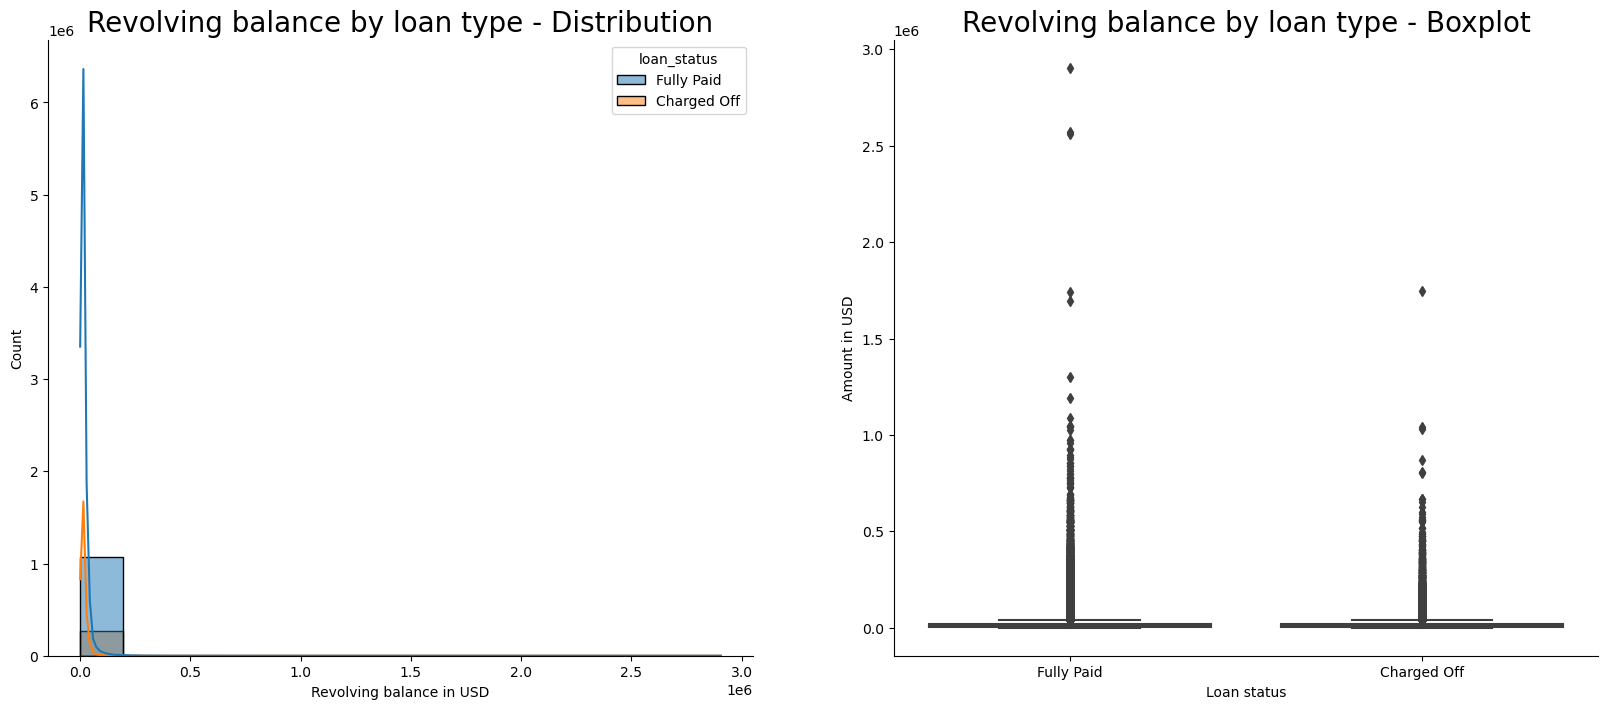

In [23]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Revolving balance in USD', ylabel='')
ax[0].set_title('Revolving balance by loan type - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Revolving balance by loan type - Boxplot', size=20)

sns.histplot(data=df,x="revol_bal",hue="loan_status",bins=15,
             kde=True,ax=ax[0])
sns.boxplot(data=df,x="loan_status",y="revol_bal",ax=ax[1]).set(xlabel='Loan status',
                                                                ylabel='Amount in USD')

By looking at the boxplot, the feature seems to be right skewed. Also, it seems like there are a lot of outliers within the feature. 

`fico_range_high`

In [24]:
df['fico_range_high'].describe()

count    1.345310e+06
mean     7.001852e+02
std      3.185316e+01
min      6.290000e+02
25%      6.740000e+02
50%      6.940000e+02
75%      7.140000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64

[Text(0.5, 0, 'Loan status'), Text(0, 0.5, 'FICO score high range')]

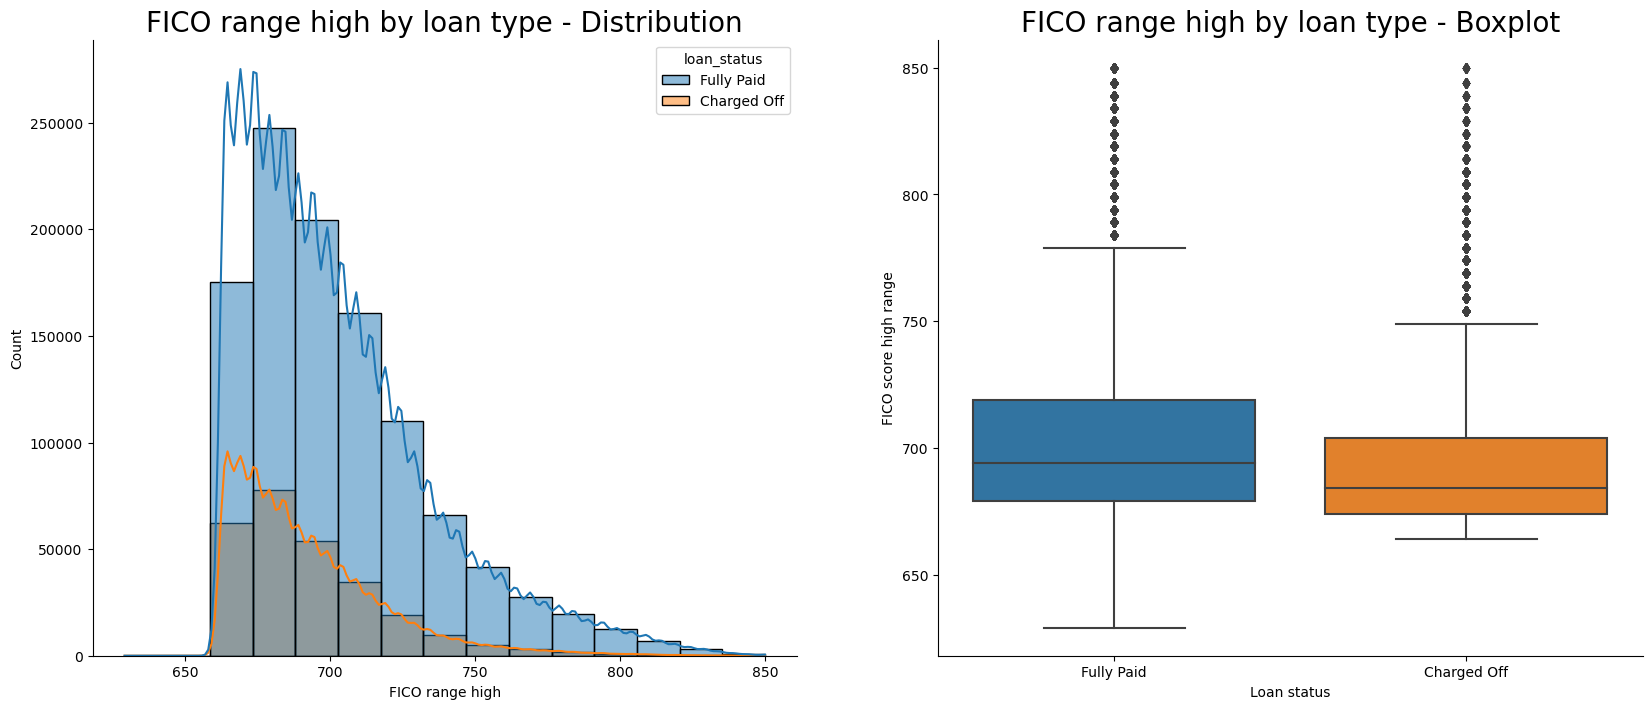

In [25]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='FICO range high', ylabel='')
ax[0].set_title('FICO range high by loan type - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('FICO range high by loan type - Boxplot', size=20)

sns.histplot(data=df,x="fico_range_high",hue="loan_status",bins=15,
             kde=True,ax=ax[0])
sns.boxplot(data=df,x="loan_status",y="fico_range_high",ax=ax[1]).set(xlabel='Loan status',
                                                                      ylabel='FICO score high range')

`fico_range_low`

In [26]:
df['fico_range_low'].describe()

count    1.345310e+06
mean     6.961850e+02
std      3.185251e+01
min      6.250000e+02
25%      6.700000e+02
50%      6.900000e+02
75%      7.100000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

[Text(0.5, 0, 'Loan status'), Text(0, 0.5, 'FICO score low range')]

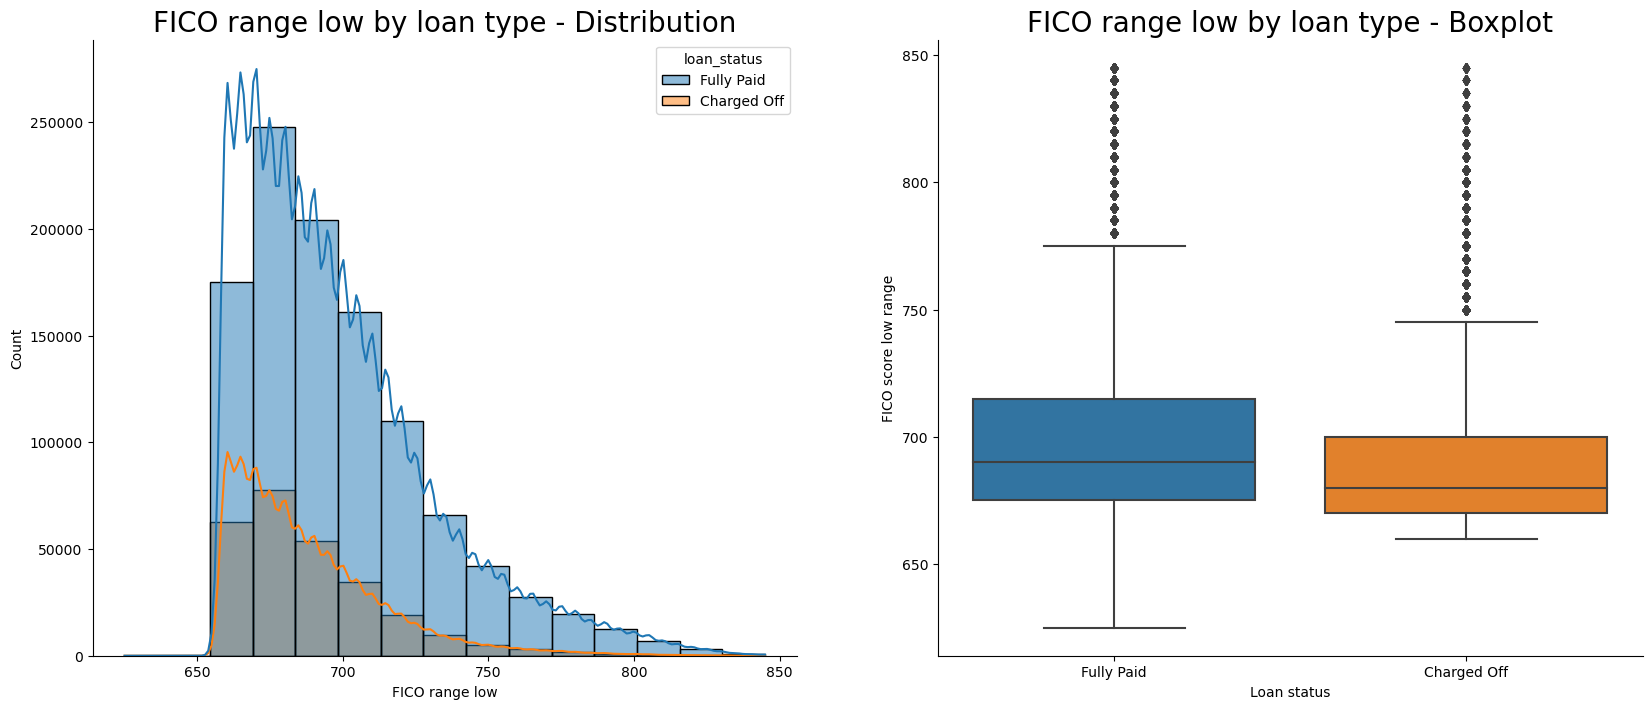

In [27]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='FICO range low', ylabel='')
ax[0].set_title('FICO range low by loan type - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('FICO range low by loan type - Boxplot', size=20)

sns.histplot(data=df,x="fico_range_low",hue="loan_status",bins=15,
             kde=True,ax=ax[0])
sns.boxplot(data=df,x="loan_status",y="fico_range_low",ax=ax[1]).set(xlabel='Loan status',
                                                                     ylabel='FICO score low range')

`fico_range_high` and `fico_range_low` has pretty similar distribution. This is expected since FICO scores typically follow a range. Consider taking the average of these two features since it won't change their distribution all that much.

`purpose`

First, let's investigate the number of unique entries contained within the feature.

In [28]:
df['purpose'].nunique()

14

In [29]:
df['purpose'].unique().tolist()

['debt_consolidation',
 'small_business',
 'home_improvement',
 'major_purchase',
 'credit_card',
 'other',
 'house',
 'vacation',
 'car',
 'medical',
 'moving',
 'renewable_energy',
 'wedding',
 'educational']

Investigate the number of each loan applications on each loan `purpose` with respect to `loan_status`.

<Axes: xlabel='purpose', ylabel='count'>

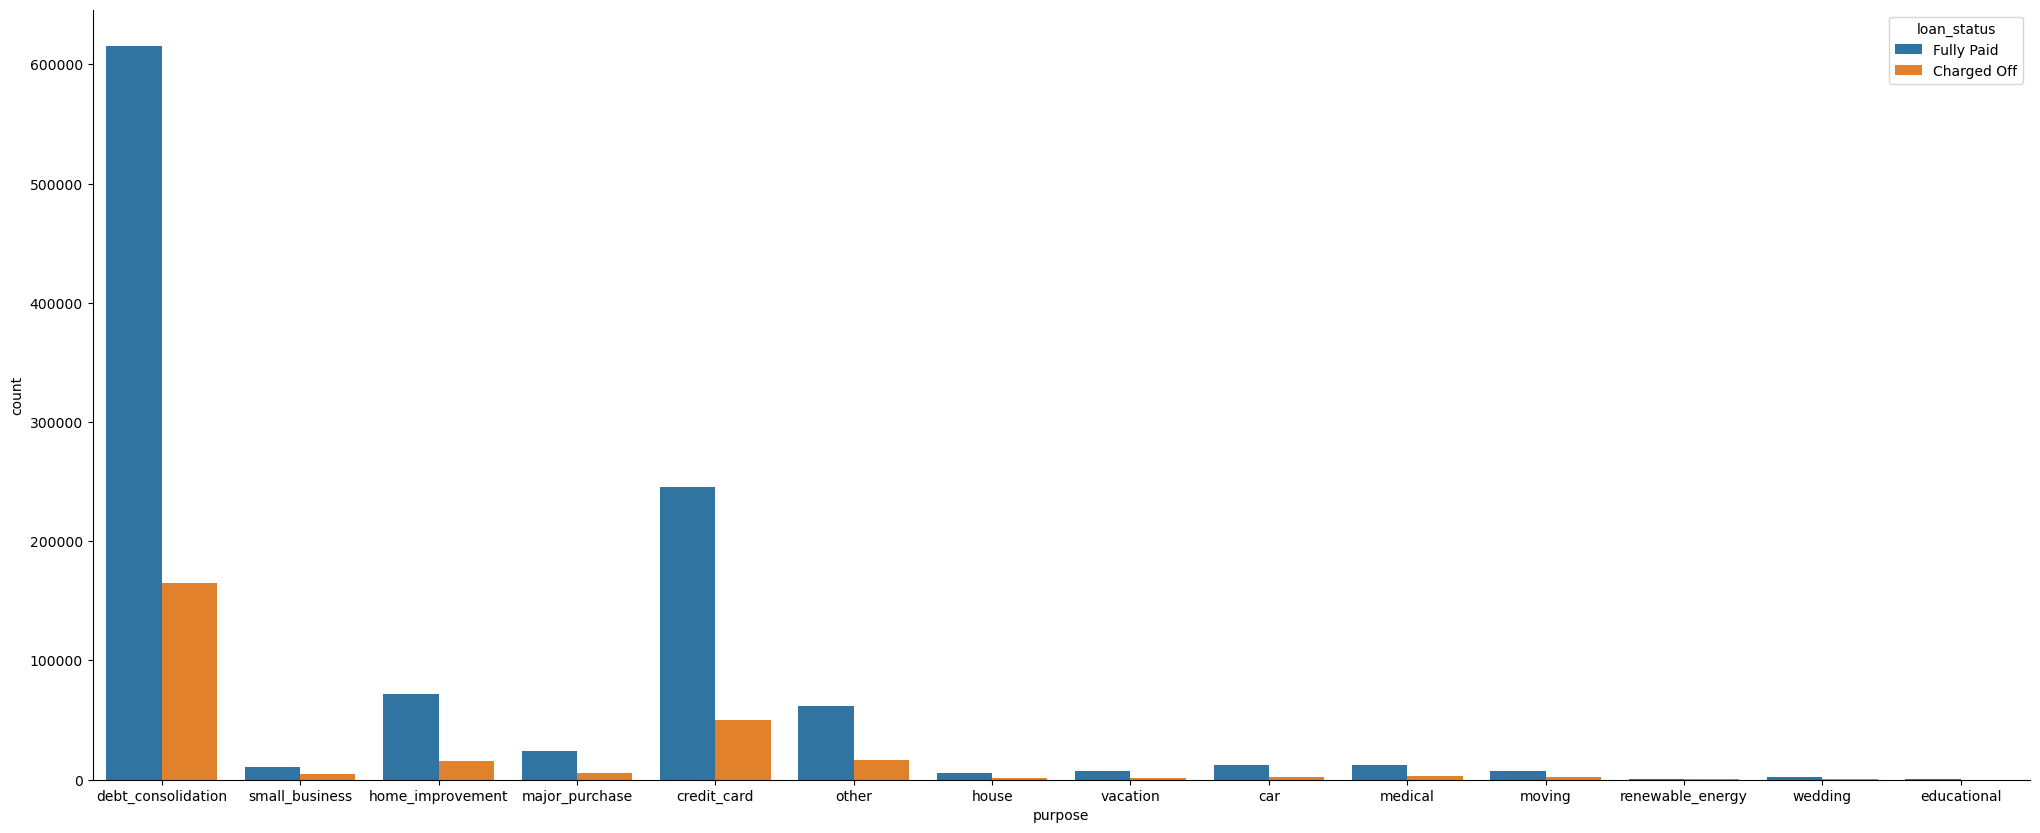

In [30]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.despine()
sns.countplot(data=df, x='purpose', hue='loan_status')

Based on the graph, `debt_consolidation`, `home_improvement`, and `credit_card` have the highest number of charged off loans. However, it is quite hard to conclude the percentage of charge off loans for each category. Therefore, we create a table calculating the percentage of charged off loans for each purpose.

In [31]:
df_co = df[df['loan_status'] == 'Charged Off'].groupby('purpose').count()[['loan_status']]

df_total = df.groupby('purpose').count()[['loan_status']]

percent_co = df_co / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,purpose,Percentage Charged Off Loans
0,car,14.679465
1,credit_card,16.927042
2,debt_consolidation,21.146938
3,educational,17.177914
4,home_improvement,17.715762
5,house,21.880601
6,major_purchase,18.599830
7,medical,21.775749
8,moving,23.354430
9,other,21.040128


`small_business`, `renewable_energy`, and `moving` have the highest percentage of charged off loans.

`dti`

In [32]:
df['dti'].describe()

count    1.344936e+06
mean     1.828267e+01
std      1.116045e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64

`dti` should not be negative as a negative DTI ratio would imply either negative debt (which doesn't make sense in this context, as you can't owe negative money) or negative income (which would indicate that you are paying to work, rather than earning from work). Both scenarios are not feasible in standard financial practice. Let's inspect how many data points has a negative value.

In [34]:
df[df['dti'] < 0]['dti'].value_counts()

-1.0    2
Name: dti, dtype: int64

There are 2 data points within this feature having negative value. Further processing should be performed on this two instances. Recommend dropping these points as they don't represent the majority of the data.

[Text(0.5, 0, 'Loan status'), Text(0, 0.5, 'dti')]

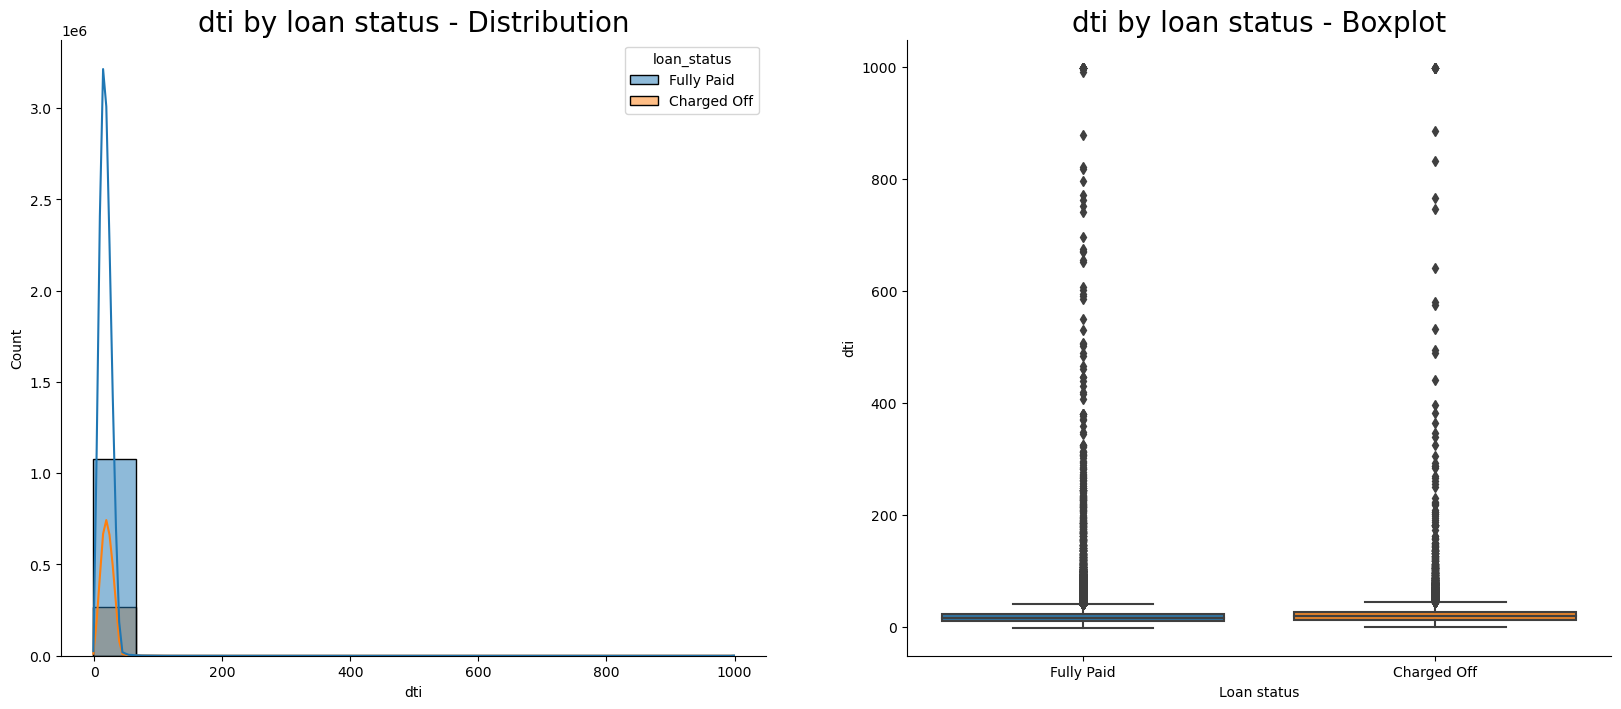

In [35]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='dti', ylabel='')
ax[0].set_title('dti by loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('dti by loan status - Boxplot', size=20)

sns.histplot(data=df,x="dti",hue="loan_status",bins=15,
             kde=True,ax=ax[0])
sns.boxplot(data=df,x="loan_status",y="dti",ax=ax[1]).set(xlabel='Loan status',
                                                                     ylabel='dti')

By looking at the boxplot, this feature is right skewed with numerous outliers.

`issue_d` 

Convert `issue_d` column to DateTime type

In [39]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

Create a year column

In [40]:
df['year'] = df['issue_d'].dt.year

<Axes: xlabel='year', ylabel='count'>

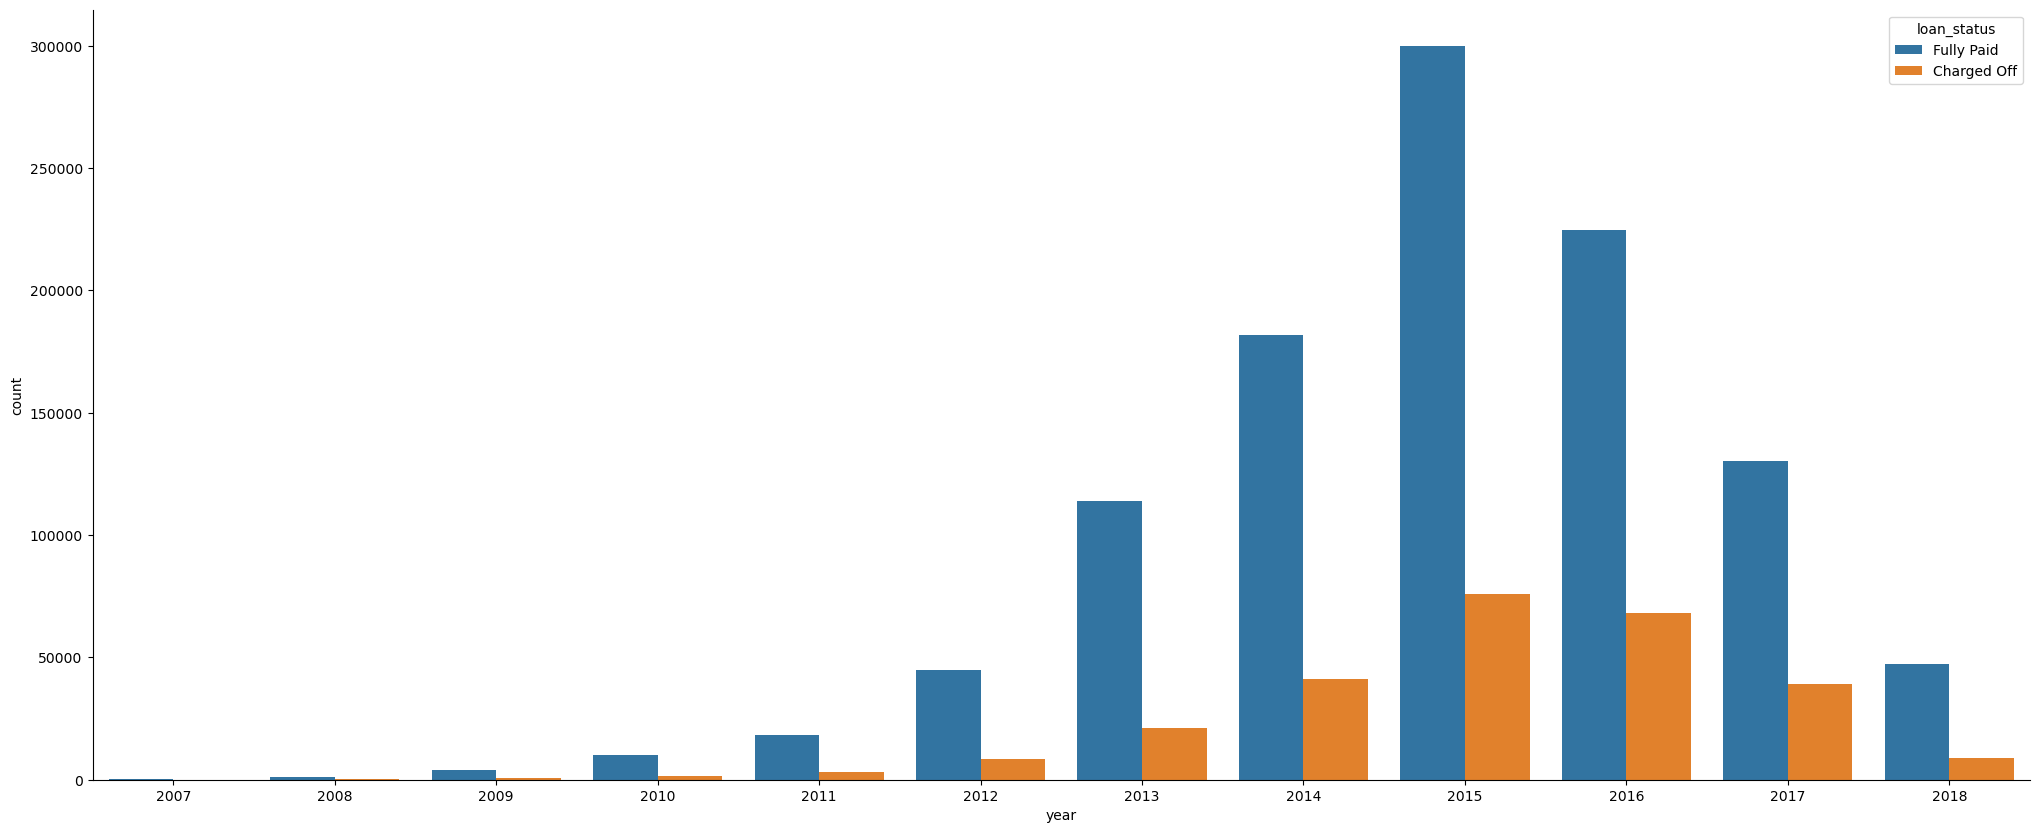

In [41]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.despine()
sns.countplot(data=df, x='year', hue='loan_status')

Based on the graph, the period from 2013 to 2017 has the highest number of loan applications. However, we can't see the percentage of charged off loans within each year. Let's create a table to calculate this.

In [42]:
df_co = df[df['loan_status'] == 'Charged Off'].groupby('year').count()[['loan_status']]

df_total = df.groupby('year').count()[['loan_status']]

percent_co = df_co / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,year,Percentage Charged Off Loans
0,2007,17.928287
1,2008,15.813060
2,2009,12.595420
3,2010,12.890083
4,2011,15.178859
5,2012,16.197275
6,2013,15.595976
7,2014,18.449409
8,2015,20.184798
9,2016,23.283236


Based on the table, `2015`, `2016`, and `2017` are the years with the highest percentage of charged off loans.

`verification_status`

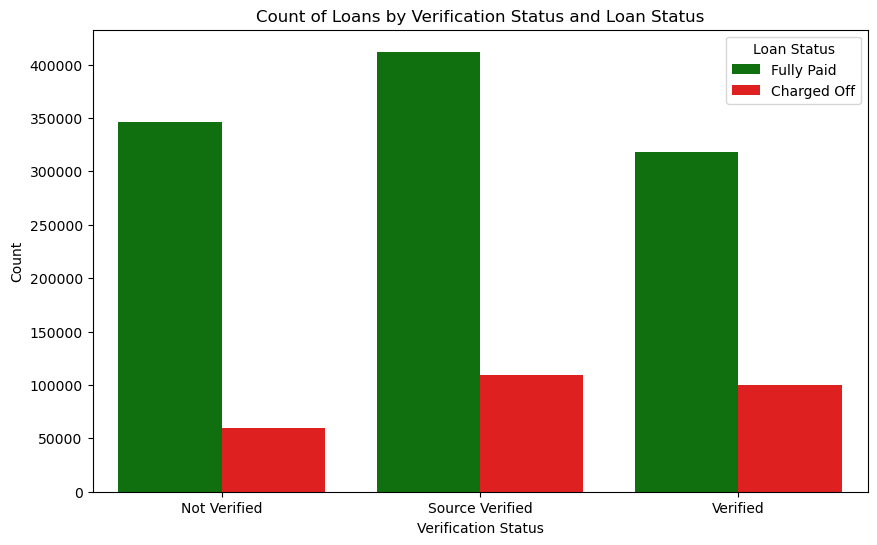

In [18]:
# 1. Countplot of verification status by loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='loan_status', data=df,
              palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title('Count of Loans by Verification Status and Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()



All green bars (fully paid) are much taller than the red bars (charged off). The majority of loans are fully paid, indicating a higher success rate compared to charged off loans.

`installment`

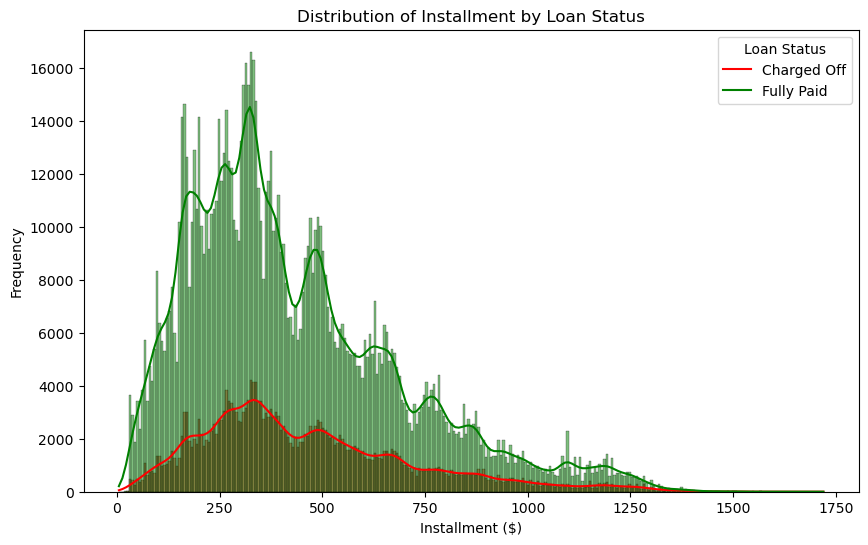

In [15]:
# 2. Distribution of installment by loan status
plt.figure(figsize=(10, 6))
sns.histplot(df, x='installment', hue='loan_status', kde=True, palette={'Charged Off': 'red', 'Fully Paid': 'green'}, legend=True)
plt.title('Distribution of Installment by Loan Status')
plt.xlabel('Installment ($)')
plt.ylabel('Frequency')
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'])
plt.show()


`emp_length`

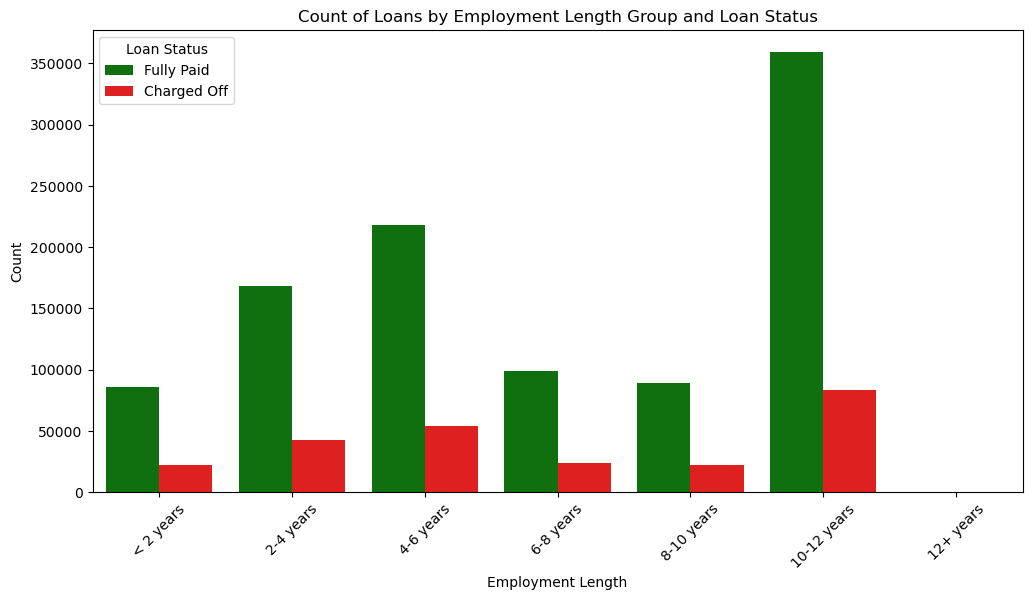

In [11]:
# 3. Countplot of employment length by loan status
df['emp_length_numeric'] = df['emp_length'].replace({'< 1 year': 0, '1 year': 1,
                                                     '2 years': 2, '3 years': 3,
                                                     '4 years': 4, '5 years': 5,
                                                     '6 years': 6, '7 years': 7,
                                                     '8 years': 8, '9 years': 9,
                                                     '10+ years': 10})

# Create bins for employment length
bins = [-1, 1, 3, 6, 8, 10, 12, float('inf')]
labels = ['< 2 years', '2-4 years', '4-6 years', '6-8 years', '8-10 years', '10-12 years', '12+ years']
df['emp_length_group'] = pd.cut(df['emp_length_numeric'], bins=bins, labels=labels, right=False)

# Countplot of employment length by loan status with increased granularity
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length_group', hue='loan_status', data=df,
              palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title('Count of Loans by Employment Length Group and Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()



Employment length between 10 to 12 years have the highest count of loans, and there's none more than 12 years.

`term`

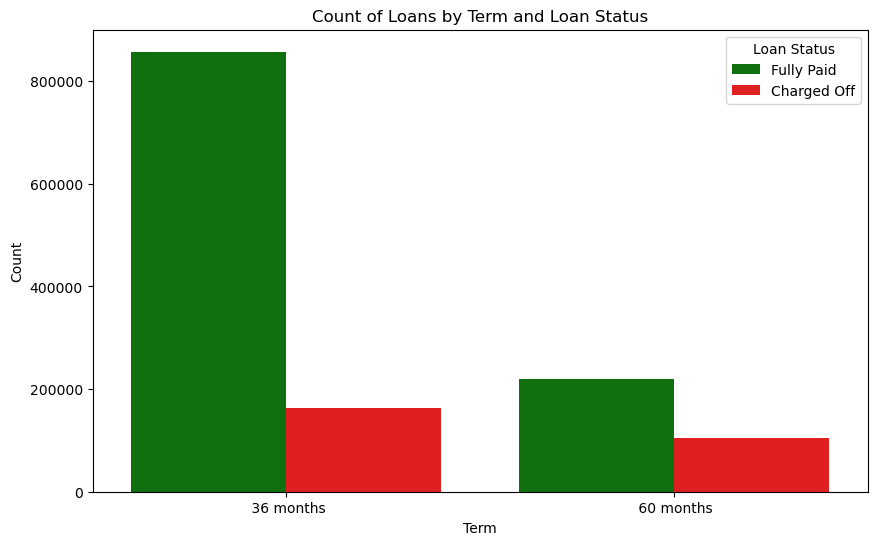

In [12]:
# 4. Countplot of loan term by loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=df,
              palette={'Charged Off': 'red', 'Fully Paid': 'green'})
plt.title('Count of Loans by Term and Loan Status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()



Loans with a term of 36 months are most common among fully paid loans, while charged off loans show similar frequencies for both 36 and 60-month terms.

`grade`

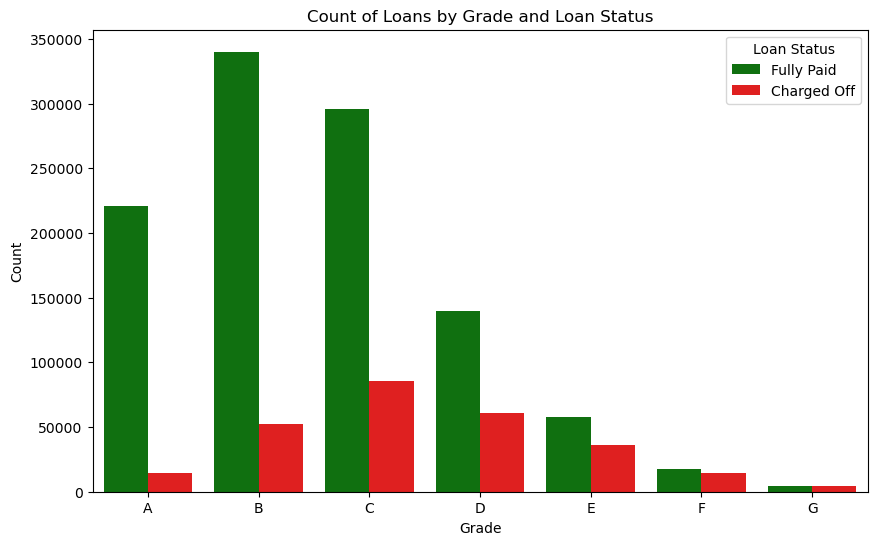

In [13]:
# 5. Countplot of loan grade by loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=df,
              palette={'Charged Off': 'red', 'Fully Paid': 'green'},
              order=sorted(df['grade'].unique()))
plt.title('Count of Loans by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()



Fully paid loans are skewed towards higher-grade categories, with grade B being the most common. 
Charged off loans, on the other hand, exhibit a more even distribution across grade categories, with grade C being the most frequent.

`sub_grade`

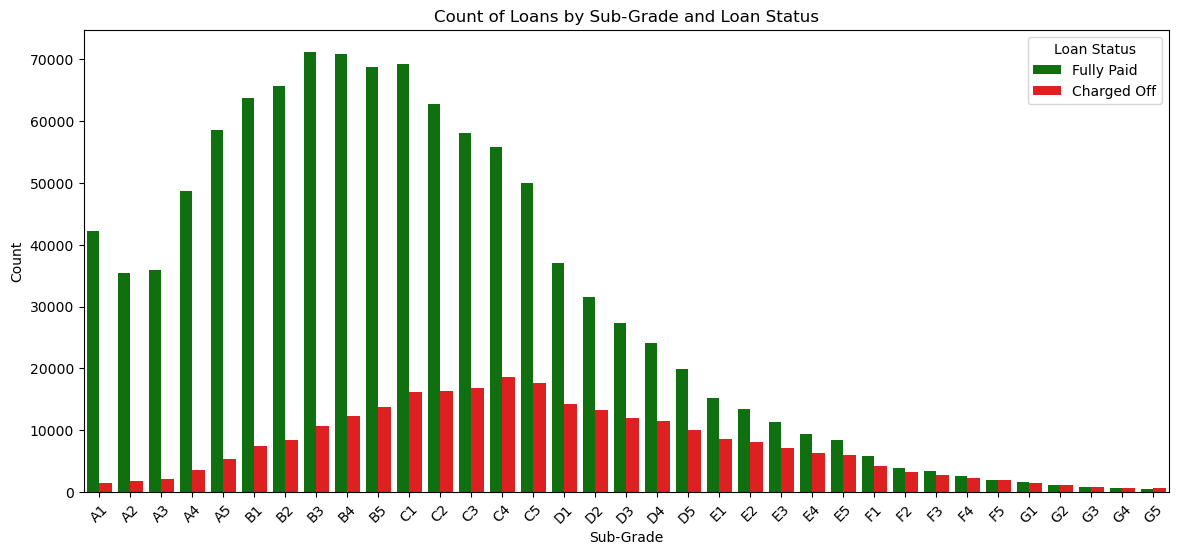

In [17]:
# 6. Countplot of loan sub-grade by loan status
plt.figure(figsize=(14, 6))
sns.countplot(x='sub_grade', hue='loan_status', data=df,
              palette={'Charged Off': 'red', 'Fully Paid': 'green'},
              order=sorted(df['sub_grade'].unique()))
plt.title('Count of Loans by Sub-Grade and Loan Status')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.show()



The distribution of sub-grades provides additional detail, showing similar trends to grades.

`int_rate`

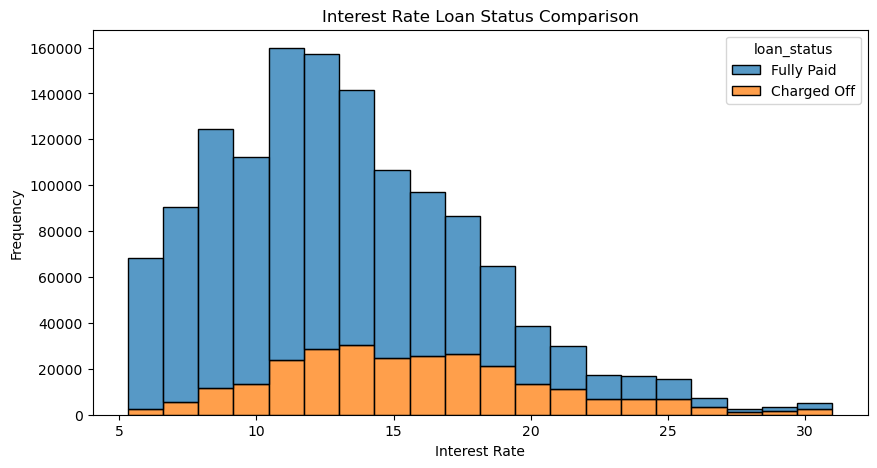

In [45]:
plt.figure(figsize=(10, 5))

sns.histplot(df, x="int_rate", bins=20, hue="loan_status", multiple="stack")
plt.title("Interest Rate Loan Status Comparison")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.show()

Based on the graph above, the higher the interest rate, the higher the probability of being charged off. The trend appears to be very strong and we may conclude that interest rate is a significant feature in predicting borrower's default risk.

`total_acc`

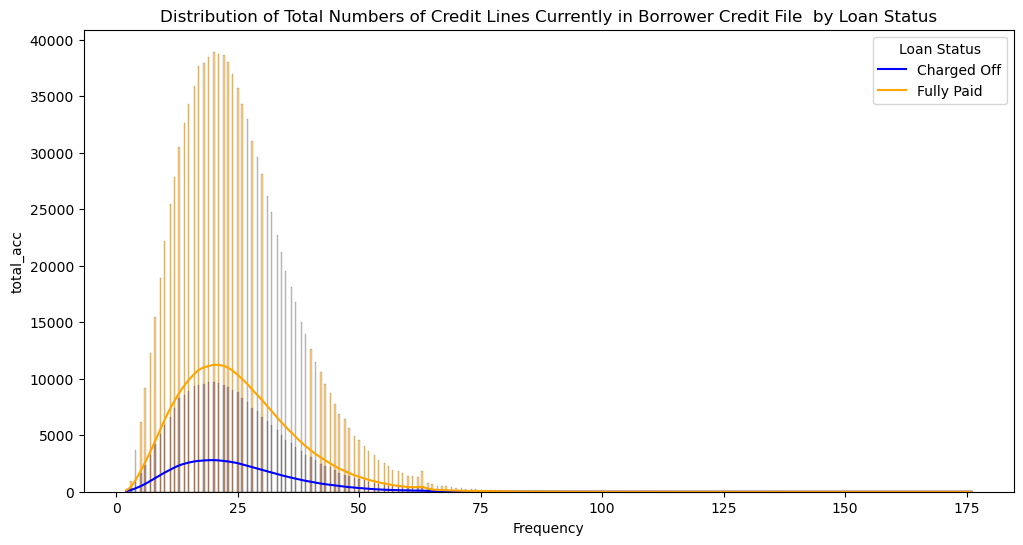

In [48]:
#Distribution of total numbers of credit lines currently in borrower's credit file by loan status
plt.figure(figsize=(12, 6))
sns.histplot(df, x='total_acc', hue='loan_status', kde=True, palette={'Charged Off': 'blue', 'Fully Paid': 'orange'}, legend=True)
plt.title('Distribution of Total Numbers of Credit Lines Currently in Borrower Credit File  by Loan Status')
plt.xlabel('Frequency')
plt.ylabel('total_acc')
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'])
plt.show()

The distribution of fully paid loans is higher across all frequencies compared to charged-off loans, indicating that there are more fully paid accounts than charged-off accounts in the dataset.
The frequency of both loan statuses decreases as the number of credit lines increases, showing a right-skewed distribution.

`earliest_cr_line`

<function matplotlib.pyplot.show(close=None, block=None)>

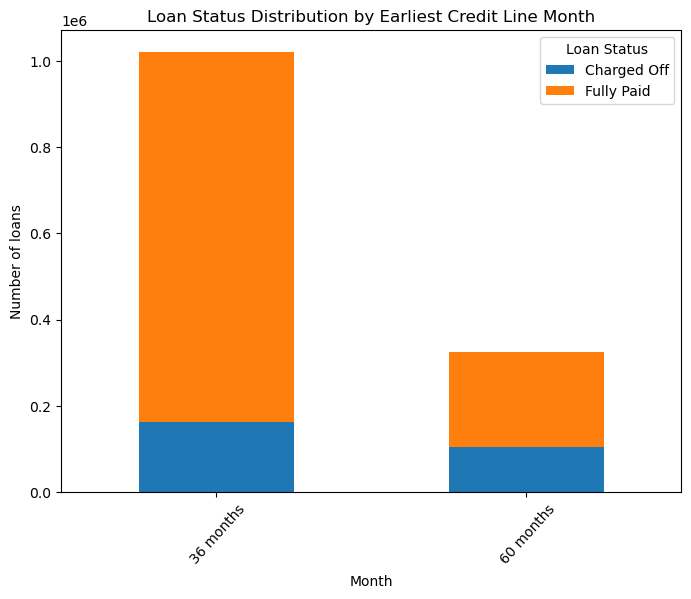

In [49]:
pivot_table = df.pivot_table(index='term', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status Distribution by Earliest Credit Line Month')
plt.ylabel('Number of loans')
plt.xlabel('Month')
plt.xticks(rotation=48)  
plt.legend(title='Loan Status')
plt.show

The data suggests that borrowers with a longer history of credit (36 months) are more likely to have fully paid off their loans than those with a shorter credit history (60 months).
It also implies that a shorter credit history is associated with a higher proportion of charged-off loans relative to fully paid ones, compared to borrowers with a longer credit history.

`revol_util`

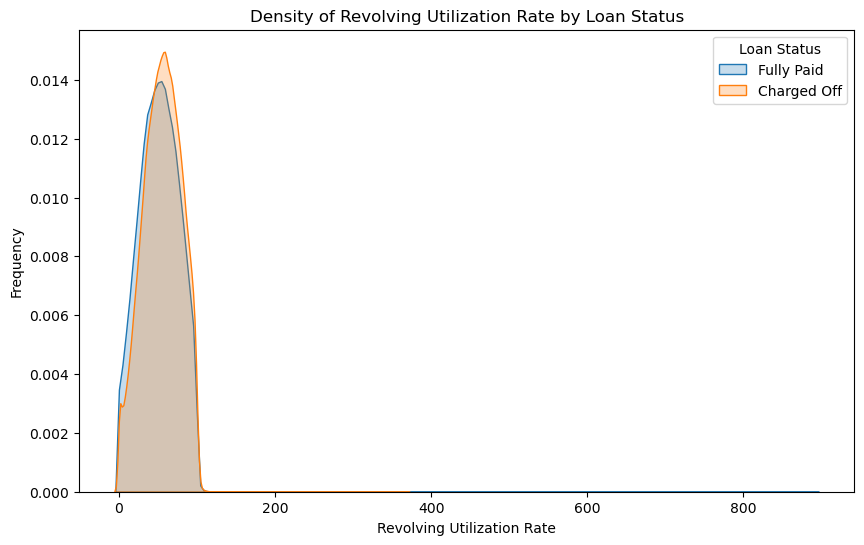

In [50]:
plt.figure(figsize=(10, 6))
for status in df['loan_status'].unique():
    subset = df[df['loan_status'] == status]
    sns.kdeplot(subset['revol_util'], label=status, fill=True)

plt.title('Density of Revolving Utilization Rate by Loan Status')
plt.xlabel('Revolving Utilization Rate')
plt.ylabel('Frequency')
plt.legend(title='Loan Status')
plt.show()

The density curves are sharp and peak at a low revolving utilization rate, suggesting that most borrowers, regardless of loan status, have low utilization rates.
The graph suggests that most borrowers with either loan status tend to have a lower revolving utilization rate, and there is a presence of borrowers with high utilization rates although they are less common. It also hints that having a lower revolving utilization rate could be associated with a higher likelihood of fully paying off a loan.

`pub_rec_bankruptcies`

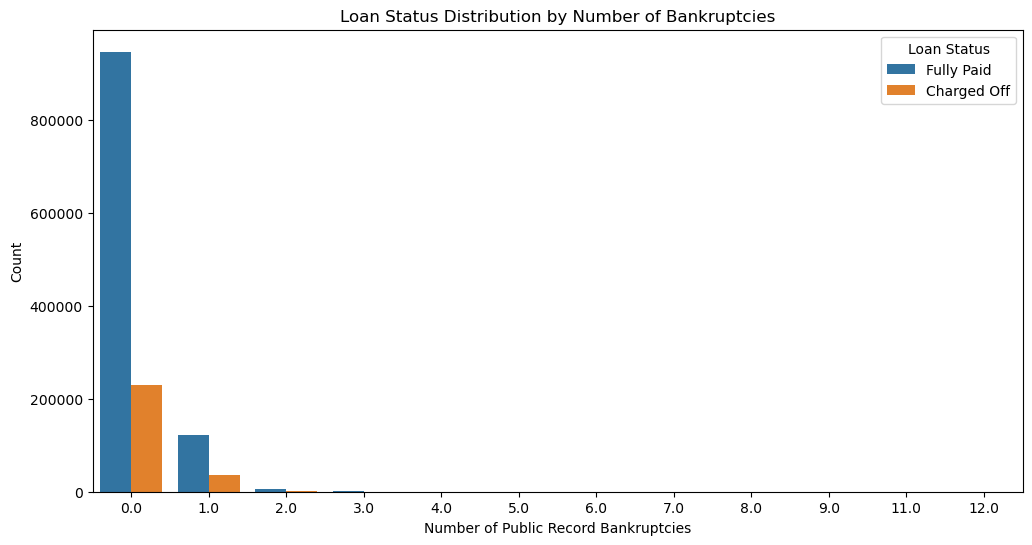

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=df)
plt.title('Loan Status Distribution by Number of Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

The data indicates that borrowers with no public record of bankruptcy are more likely to fully pay off their loans, and the likelihood of both fully paying a loan and having a loan charged off decreases as the number of bankruptcies increases. This suggests that bankruptcy is a strong indicator of loan repayment risk.
For borrowers with one bankruptcy, there are still more fully paid loans than charged off, but the number of loans is significantly lower compared to borrowers with no bankruptcies.
As the number of bankruptcies increases to two or more, the number of loans drops drastically and becomes minimal.

In [52]:
df_co = df[df['loan_status'] == 'Charged Off'].groupby('pub_rec_bankruptcies').count()[['loan_status']]

df_total = df.groupby('pub_rec_bankruptcies').count()[['loan_status']]

percent_co = df_co / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,pub_rec_bankruptcies,Percentage Charged Off Loans
0,0.0,19.581411
1,1.0,22.526887
2,2.0,24.790835
3,3.0,22.615287
4,4.0,27.777778
5,5.0,23.404255
6,6.0,34.782609
7,7.0,26.666667
8,8.0,44.444444
9,9.0,33.333333


`mort_acc`

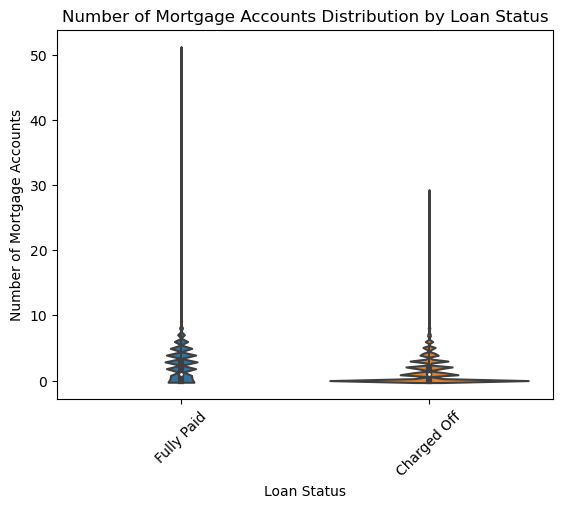

In [53]:
sns.violinplot(x='loan_status', y='mort_acc', data=df)
plt.title('Number of Mortgage Accounts Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Mortgage Accounts')
plt.xticks(rotation=45)
plt.show()

Both distributions are relatively peaked around the lower end, which means most borrowers have a small number of mortgage accounts.
For "Fully Paid" loans, the distribution is wider and has a longer tail, indicating a broader range of the number of mortgage accounts.
The "Charged Off" loans have a narrower distribution, suggesting that there is less variability in the number of mortgage accounts among borrowers who have defaulted.

`emp_title`

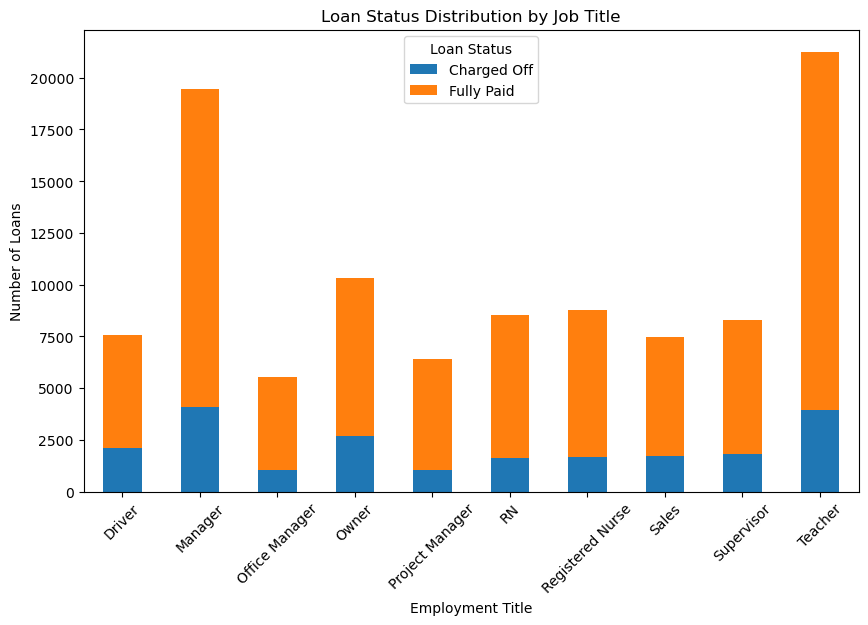

In [54]:
top_job_titles = df['emp_title'].value_counts().nlargest(10).index
filtered_df = df[df['emp_title'].isin(top_job_titles)]

# Creating a crosstab or pivot table for plotting
pivot_table = pd.crosstab(index=filtered_df['emp_title'], columns=filtered_df['loan_status'])

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Status Distribution by Job Title')
plt.xlabel('Employment Title')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


The data suggests that certain professions, like "Teacher" and "Manager," may have a higher number of loans but also a higher rate of fully paying them off. In contrast, other professions like "Driver" and "Registered Nurse" have fewer loans in this dataset. This could potentially inform financial institutions about the loan repayment patterns associated with different employment titles.